# MileStone Project
## Problem Defination
### Data
### Evaluate
### Feature
### Modeling
### Experimentation
- Secure Heart Disease Data
- Load Data 
- Perform Data Analysis (EDA)
    - Get data Features
    - Load Environment
- Load ML and DL libraries
- 

In [1]:
# Data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model import evaluation libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
np.random.seed(7)
import pickle as pc
%matplotlib inline

# Problem Defination
+ Based on the given data we need to predict if a patient has heart disease or not

# Data
> + Data Loaded,
> Make Sure if out model give us the 95% accuracy or above

In [2]:
df = pd.read_csv('heart.csv')
df
# df['thall'].unique()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Evaluate
>> In Initial stages we need to make sure if our model gives us that accuracy

# Features
+ age = age
+ sex = sex (0,1)
+ cp = chest pain type (4 values)
+ trestbps = resting blood pressure
+ chol = serum cholestoral in mg/dl
+ fbs = fasting blood sugar > 120 mg/dl
+ restecg = resting electrocardiographic results (values 0,1,2)
+ thalach = maximum heart rate achieved
+ exang  = exercise induced angina
+ oldpeak = ST depression induced by exercise relative to rest
+ slp = the slope of the peak exercise ST segment
+ caa = number of major vessels (0-3) colored by flourosopy
+ thal =  0 = normal; 1 = fixed defect; 2 = reversable defect 3 = irreversible
> The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Exploratory Data Analysis

In [3]:
# What is the problem i am going to solve
    #> With out knowing problem, worst thing I can do is the hard work
# what kind of data I have
# Does this data have missing value
# Are there any outliers, sporious vectors
# can er add or remove some of the features

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.rename(columns={'output':'target'}, inplace =True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='target'>

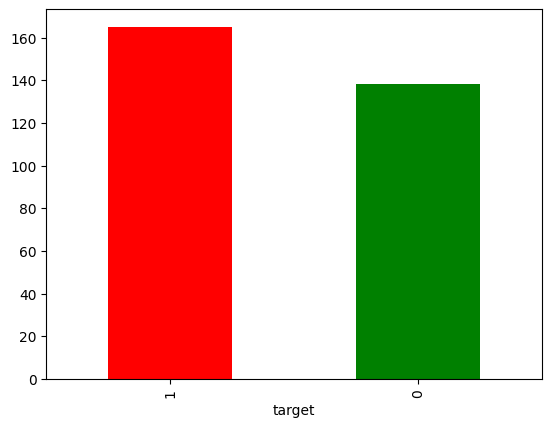

In [8]:
df['target'].value_counts().plot(kind = 'bar', color = ['red','green'])

In [9]:
df.isna().sum() # are there any empty values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


sex
1    207
0     96
Name: count, dtype: int64

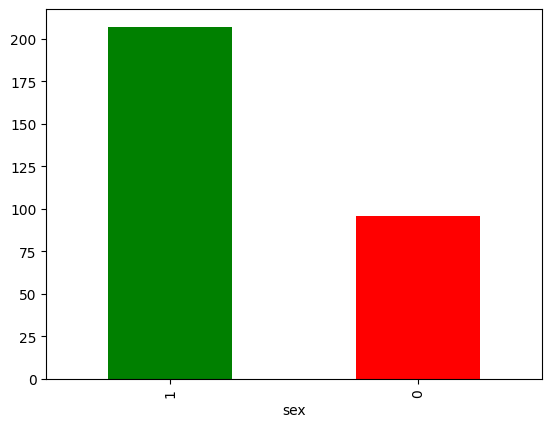

In [11]:
df.sex.value_counts().plot(kind = 'bar', color = ['green', 'red']) # 1 = male, 0 = female
df.sex.value_counts()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

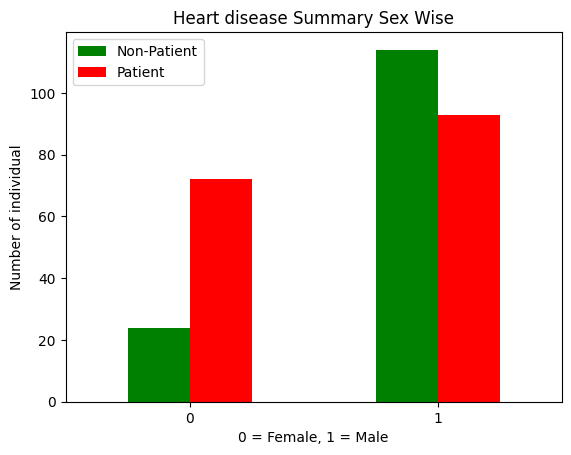

In [12]:
pd.crosstab(df.sex, df.target).plot(kind = 'bar', color = ['green', 'red'])
# pd.crosstab(df.sex, df.age).plot(kind = 'bar', color = ['green', 'red'])
plt.title('Heart disease Summary Sex Wise')
plt.xlabel('0 = Female, 1 = Male')
plt.ylabel('Number of individual')
plt.legend(['Non-Patient',"Patient"])
plt.xticks(rotation = 0)

(array([20., 30., 40., 50., 60., 70., 80.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

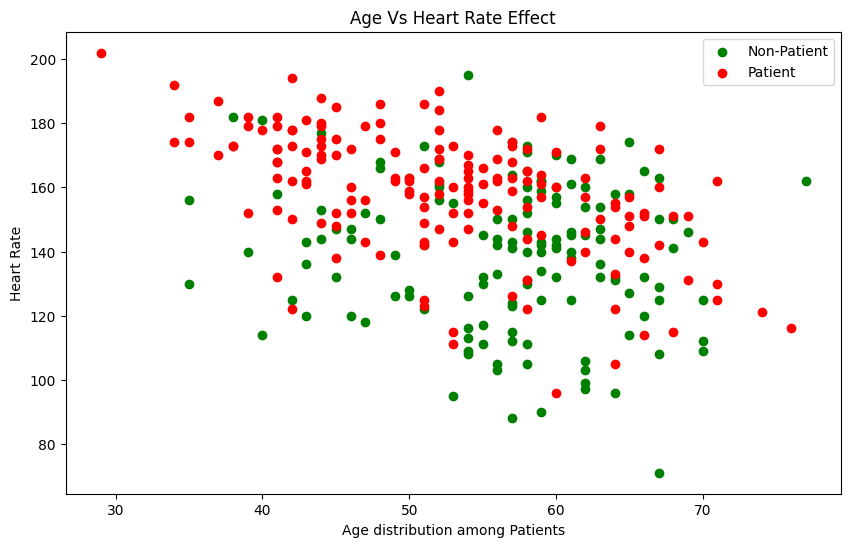

In [13]:
# Plot Choice
plt.figure(figsize=(10,6))
# create scatter plot
plt.scatter(df.age[df.target==0], df.thalachh[df.target==0], c = "green");
plt.scatter(df.age[df.target==1], df.thalachh[df.target==1], c = "red");
# surkhi power means coustomization
plt.title('Age Vs Heart Rate Effect')
plt.xlabel('Age distribution among Patients')
plt.ylabel('Heart Rate')
plt.legend(['Non-Patient',"Patient"])
plt.xticks(rotation = 0)

<Axes: ylabel='Frequency'>

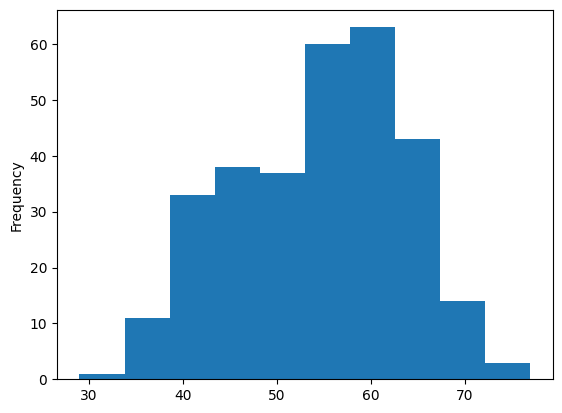

In [14]:
# craete Histogram to see distribution 
df.age.plot.hist()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

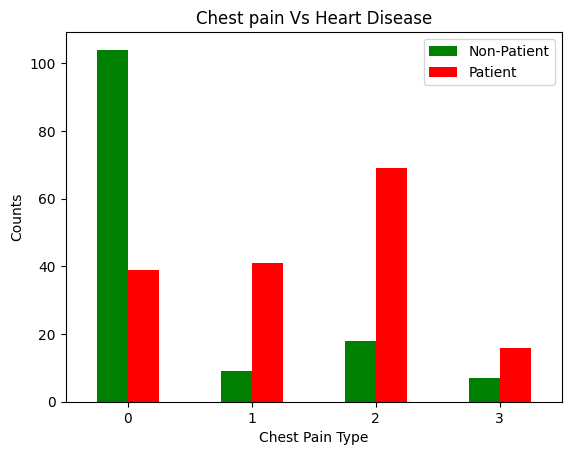

In [15]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar', color = ['green', 'red'])
# pd.crosstab(df.sex, df.age).plot(kind = 'bar', color = ['green', 'red'])
plt.title('Chest pain Vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['Non-Patient',"Patient"])
plt.xticks(rotation = 0)

In [16]:
# Correlation Matrix
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


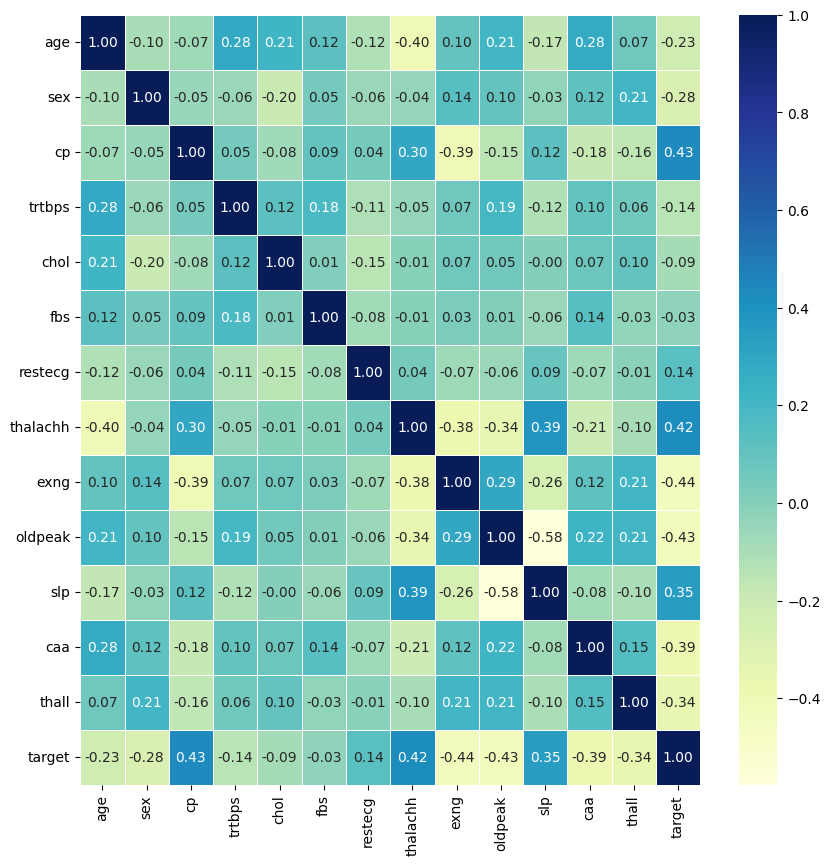

In [17]:
df_cor = df.corr()
home, room = plt.subplots(figsize = (10,10))
room = sns.heatmap(df_cor,
                  annot=True,
                  linewidths=0.5,
                  fmt='0.2f',
                  cmap='YlGnBu')

# Modelling

In [18]:
# Model Selection
X = df.drop('target', axis = 1)
y = df['target']

In [19]:
# use random seed to fix results
np.random.seed(7)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [20]:
print(len(X))
print(len(X_train))
print(len(X_test))

303
242
61


In [21]:
# Lets Choose Model From Model
# 1. K_nearest_Neighbours Classifiers
# 2. Random Forest Classifier
# 3. Logistic Regression

In [22]:
models  = {"KNN": KNeighborsClassifier(),
           "Random_Forest": RandomForestClassifier(),
           "Logistic_regression": LogisticRegression()
          }
def fit_model_score(models, X_train, X_test, y_train,y_test):
    np.random.seed(7)
    model_score = {} # dictionary to model
    for name,model in models.items():
        model.fit(X_train, y_train) # looping through 
        model_score[name] = model.score(X_test, y_test)
    return model_score
fit_model_score(models, X_train, X_test, y_train,y_test)



/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random_Forest': 0.7213114754098361,
 'Logistic_regression': 0.7377049180327869}

In [23]:
model_scores = fit_model_score(models = models,
                              X_train = X_train,
                              X_test = X_test,
                              y_train = y_train,
                              y_test = y_test)
model_scores

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random_Forest': 0.7213114754098361,
 'Logistic_regression': 0.7377049180327869}

(array([0]), [Text(0, 0, 'Accuracy')])

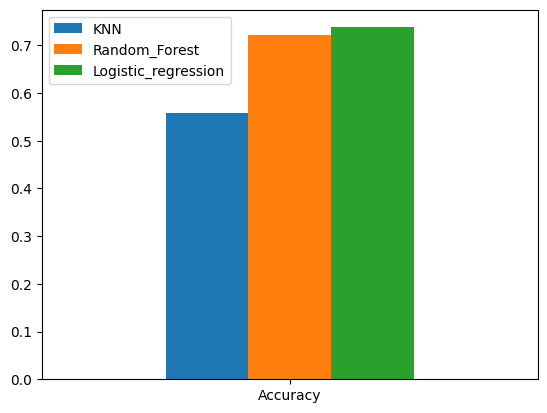

In [24]:
# Cmpare Model
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.plot.bar()
plt.xticks(rotation = 0)

# Improving and Tunning Model
    General Universal methods for all classificatin
    * Hyperparameter Tunning
    * Feature Imroving
    Advance Level
    * Confudion Matrix
    * Cross_Validation
    * Prescison
    * Recall
    * f1
    * classofocation report
    * ROC Curve
    * Hyperparamerts
    * Feature Improving
    

Max KNN Score :70.49%


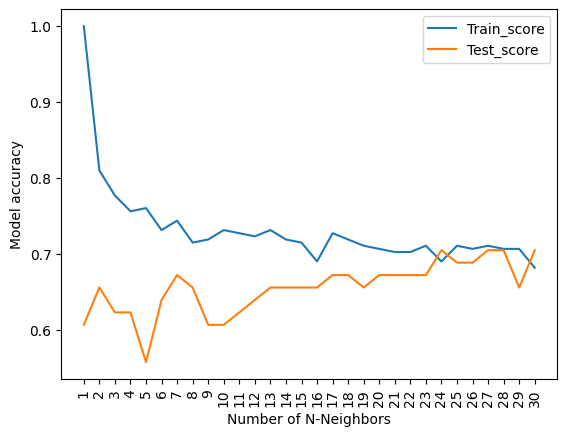

In [25]:
train_score = []
test_score = []
# create range to be the test for n_neighbors
nneigh = range(1, 31)
# KNN Instance
KNN = KNeighborsClassifier()

for i in nneigh:
    KNN.set_params(n_neighbors=i)
    # Run the fit for i value
    KNN.fit(X_train, y_train)
    # Update the training score
    train_score.append(KNN.score(X_train, y_train))
    # Update the test score
    test_score.append(KNN.score(X_test, y_test))
# Plot accuracy
plt.plot(nneigh, train_score,label = "Train_score")
plt.plot(nneigh, test_score,label = "Test_score")
plt.xticks(np.arange(1,31,1), rotation = 90)
plt.xlabel('Number of N-Neighbors')
plt.ylabel('Model accuracy')
plt.legend()
print(f'Max KNN Score :{max(test_score)*100:0.2f}%')

Max KNN Score :78.69%


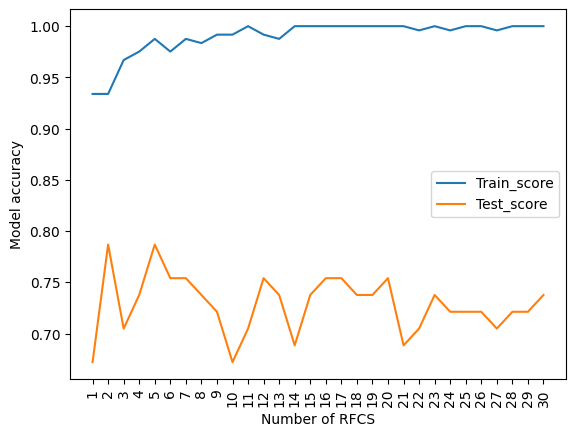

In [26]:
train_score1 = []
test_score1 = []
# create range to be the test for n_neighbors
rfcs = range(1, 31)
# KNN Instance
RFC = RandomForestClassifier()

for i in rfcs:
    RFC.set_params(n_estimators=i)
    # Run the fit for i value
    RFC.fit(X_train, y_train)
    # Update the training score
    train_score1.append(RFC.score(X_train, y_train))
    # Update the test score
    test_score1.append(RFC.score(X_test, y_test))
# Plot accuracy
plt.plot(rfcs, train_score1,label = "Train_score")
plt.plot(rfcs, test_score1,label = "Test_score")
plt.xticks(np.arange(1,31,1), rotation = 90)
plt.xlabel('Number of RFCS')
plt.ylabel('Model accuracy')
plt.legend()
print(f'Max KNN Score :{max(test_score1)*100:0.2f}%')

# Hyperparameters Tunning by GSCV

In [44]:
# Solver, C 
lr_hp = {"C": np.logspace(-4,4,20),
         "solver":['liblinear']}

rfc_hp = {"n_estimators": np.arange(10,1600,100),
         "max_depth":[None, 3,5,6,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
         }

In [45]:
# Tune Logistic Regreeesion
np.random.seed(7)
# lets use RSCV to tune HP
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=lr_hp,
                       cv =5,
                       n_iter= 20,
                       verbose=True)
lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
lr.score(X_test, y_test)

0.7540983606557377

In [ ]:
# Tune Logistic Regreeesion
np.random.seed(7)
# lets use RSCV to tune HP
rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rfc_hp,
                       cv =5,
                       n_iter= 20,
                       verbose=True)
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rfc.score(X_train, y_train)